# МКР для решения 1D линейного эллиптического уравнения

## Задача c граничными условиями Дирихле

Необходимо найти поле перемещений $u(x)$ в балке длиной $L=1[м]$, один конец которой зафиксирован, а второй перемещен на 0.01[м]. Балка испытывает инерционную нагрузку от ускорения $a=100[м/c^2]$. Плотность балки распределена по закону $\rho(x) = x + 2.7e7[кг/м^3]$. Модуль Юнга балки $E = 70e9[Па]$.

![fd_1d_task_1](../images/fd_1d_task_1.svg)


### Формулировка математической модели:

\begin{align}
&\frac{\partial}{\partial x} \left( E \frac{\partial u}{\partial x}\right) + f = 0 \\
&u(0) = 0, u(1) = 0.01 \\
&E = 70e9 \\
&f = a * \rho(x) = f_a * x + f_b = 1e2 * x + 2.7e9
\end{align}

### Аналитическое решение

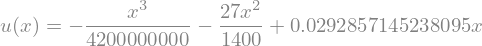

In [1]:
import sympy as sp
sp.init_printing()

u = sp.Function('u')
x = sp.symbols('x')

E = 70000000000
f_a = 100
f_b = 2700000000
f =  f_a * x + f_b
u_s = 0
u_t = 0.01

equation = (E * u(x).diff(x, 1)).diff(x, 1) + f

exact = sp.dsolve(equation, 
                  ics={u(0):u_s,
                       u(1):u_t})
display(exact)

Text(0, 0.5, 'u')

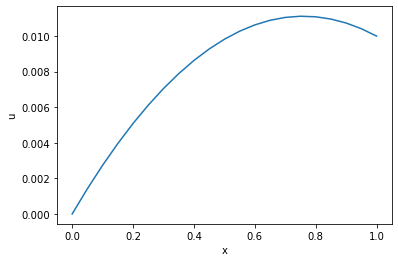

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_exact = np.arange(0., 1.05, 0.05)
plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact])
plt.xlabel('x')
plt.ylabel('u')

### Численное решение

1. Определяем узлы конечно-разностной сетки

<IPython.core.display.Javascript object>


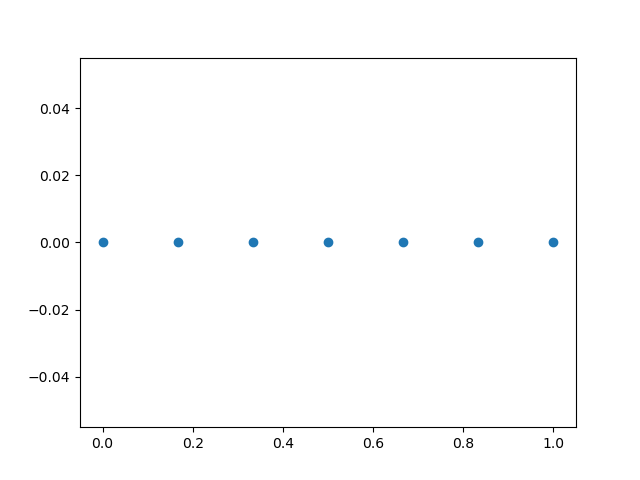

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

n = 7 # количество узлов
L = 1.
h = L/(n - 1) # шаг конечной разности
x_nodes = [i * h for i in range(n)]

fig = plt.figure()
plt.scatter(x_nodes, [0.] * len(x_nodes))

2. Используя конечные разности и полагая Е постоянной:

\begin{align}
\frac{\partial}{\partial x} \left(E \frac{\partial u_{i}}{\partial x}\right) \approx E \frac{u_{i+1} - 2u_{i} + u_{i-1}}{h^2}
\end{align}

![fd_1d](../images/fd_1d.svg)

запишем уравнение для каждого узла:

\begin{align}
E \frac{u_{i+1} - 2u_{i} + u_{i-1}}{h^2} + f_a x_i + f_b = 0.
\end{align}

Для поиска решения с помощью методов линейной алгебры необходимо свести систему к матричному виду:

\begin{align}
[A] \{u\} = \{f\},
\end{align}

где $[A]$ - матрица коэфициентов, $\{u\}$ - вектор перемещений в узлах сетки.

In [4]:
A = np.zeros((n, n))
f = np.zeros(n)

for i in range(1, n - 1):
    A[i][i + 1] = E / h ** 2
    A[i][i] = -2 * E / h **2
    A[i][i - 1] =  E / h ** 2
    
    f[i] = -f_a * x_nodes[i] - f_b
    
import pandas as pd
print('A:')
print(pd.DataFrame(A))
print('f:')
print(pd.DataFrame(f))

A:
              0             1             2             3             4  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00  0.000000e+00   
2  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00   
3  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12   
4  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12   
5  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12   
6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              5             6  
0  0.000000e+00  0.000000e+00  
1  0.000000e+00  0.000000e+00  
2  0.000000e+00  0.000000e+00  
3  0.000000e+00  0.000000e+00  
4  2.520000e+12  0.000000e+00  
5 -5.040000e+12  2.520000e+12  
6  0.000000e+00  0.000000e+00  
f:
              0
0  0.000000e+00
1 -2.700000e+09
2 -2.700000e+09
3 -2.700000e+09
4 -2.700000e+09
5 -2.700000e+09
6  0.000000e+00


3. Добавим в систему граничные условия:

In [5]:
# u(0) = 0
A[0][0] = 1
f[0] = u_s

# u(L) = 0.01
A[-1][-1] = 1
f[-1] = u_t

print('A:')
print(pd.DataFrame(A))
print('f:')
print(pd.DataFrame(f))

A:
              0             1             2             3             4  \
0  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00  0.000000e+00   
2  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00   
3  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12   
4  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12   
5  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12   
6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              5             6  
0  0.000000e+00  0.000000e+00  
1  0.000000e+00  0.000000e+00  
2  0.000000e+00  0.000000e+00  
3  0.000000e+00  0.000000e+00  
4  2.520000e+12  0.000000e+00  
5 -5.040000e+12  2.520000e+12  
6  0.000000e+00  1.000000e+00  
f:
              0
0  0.000000e+00
1 -2.700000e+09
2 -2.700000e+09
3 -2.700000e+09
4 -2.700000e+09
5 -2.700000e+09
6  1.000000e-02


4. Решим систему линейных алгебраических уравнений

In [6]:
u_approx = np.linalg.solve(A, f)
print('u:')
print(pd.DataFrame(u_approx))

u:
              0
0  1.967899e-17
1  4.345238e-03
2  7.619048e-03
3  9.821429e-03
4  1.095238e-02
5  1.101190e-02
6  1.000000e-02


### Анализ решения


<IPython.core.display.Javascript object>


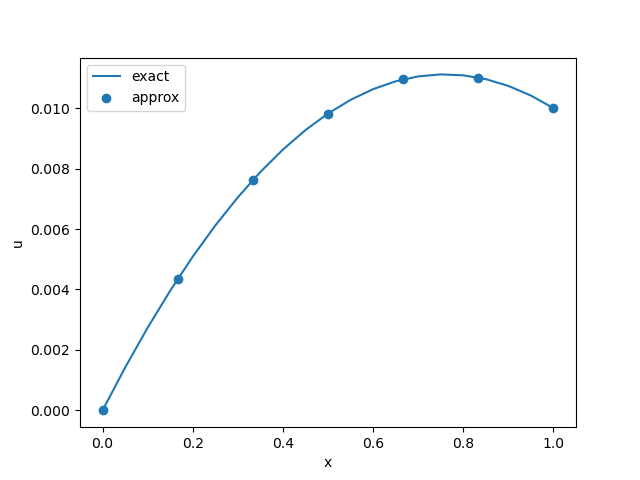

Text(0, 0.5, 'u')

In [7]:
fig = plt.figure()
plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact], label='exact')
plt.scatter(x_nodes, u_approx, label='approx')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')

### Учет граничных условий Дирихле без увеличения размерности задачи

Уравнение для узла $i=1$:

\begin{align}
E \frac{u_{i+1} - 2u_{i}}{h^2}= -2x_i - 1 - E \frac{u_{i-1}}{h^2}
\end{align}

Уравнение для узла $i = n - 2$:

\begin{align}
E \frac{-2u_{i} + u_{i-1}}{h^2}= -2x_i - 1 - E \frac{u_{i+1}}{h^2}
\end{align}


In [8]:
n = 7 # количество узлов
L = 1.
h = L/(n - 1) # шаг конечной разности
x_nodes = [i * h for i in range(n)]

A = np.zeros((n - 2, n - 2))
f = np.zeros(n - 2)

for i in range(1, n - 1):
    j = i - 1 # индекс неизвестного
    if i == 1:
        A[j][j + 1] = E / h ** 2
        A[j][j] = -2 * E / h **2
        
        f[j] = -f_a * x_nodes[i] - f_b - E * u_s / h ** 2
    elif i == n - 2:
        A[j][j] = -2 * E / h **2
        A[j][j - 1] =  E / h ** 2
        
        f[j] = -f_a * x_nodes[i] - f_b - E * u_t / h ** 2
    else:
        A[j][j + 1] = E / h ** 2
        A[j][j] = -2 * E / h **2
        A[j][j - 1] =  E / h ** 2

        f[j] = -f_a * x_nodes[i] - f_b
        
print('A:')
print(pd.DataFrame(A))
print('f:')
print(pd.DataFrame(f))

A:
              0             1             2             3             4
0 -5.040000e+12  2.520000e+12  0.000000e+00  0.000000e+00  0.000000e+00
1  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00  0.000000e+00
2  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00
3  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12
4  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12
f:
              0
0 -2.700000e+09
1 -2.700000e+09
2 -2.700000e+09
3 -2.700000e+09
4 -2.790000e+10


<IPython.core.display.Javascript object>


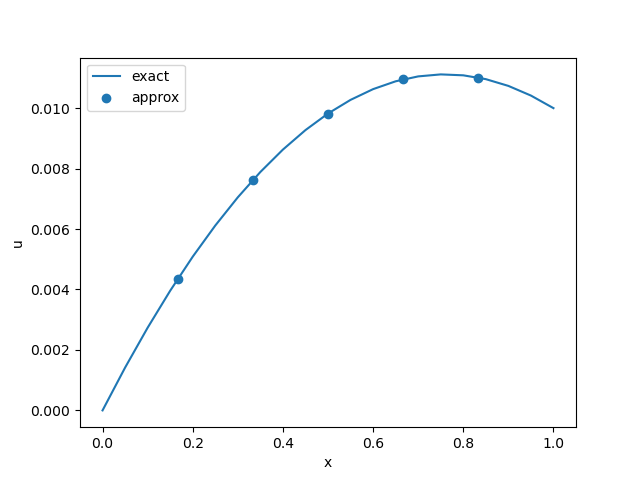

Text(0, 0.5, 'u')

In [9]:
u_approx = np.linalg.solve(A, f)

fig = plt.figure()
plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact], label='exact')
plt.scatter(x_nodes[1:-1], u_approx, label='approx')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')

## Задача c граничным условием Неймана


Необходимо найти поле перемещений $u(x)$ в балке длиной $L=1[м]$, один конец которой зафиксирован, а ко второму приложена сила растягивающая напряжение $t = 1e9[Па]$. Балка испытывает инерционную нагрузку от ускорения $a=100[м/c^2]$. Плотность балки распределена по закону $\rho(x) = x + 2.7e7[кг/м^3]$. Модуль Юнга балки $E = 70e9[Па]$.

![fd_1d_task_2](../images/fd_1d_task_2.svg)

### Формулировка математической модели

\begin{align}
&\frac{\partial}{\partial x} \left( E \frac{\partial u}{\partial x} \right) + f = 0 \\
&u(0) = 0, \left.E\frac{\partial u(x)}{\partial x}\right|_{x=1}  = t \\
&E = 70e9 \\
&f = a * \rho(x) = f_a * x + f_b = 1e2 * x + 2.7e9 \\
&t = -1.
\end{align}


### Аналитическое решение

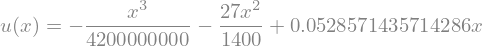

In [10]:
import sympy as sp
sp.init_printing()

u = sp.Function('u')
x = sp.symbols('x')

E = 70000000000
f_a = 100
f_b = 2700000000
f =  f_a * x + f_b
u_s = 0.
t = 1e9

equation = (E * u(x).diff(x, 1)).diff(x, 1) + f

exact = sp.dsolve(equation, 
                  ics={u(0):u_s, 
                       u(x).diff(x).subs(x, 1):t / E})
display(exact)

<IPython.core.display.Javascript object>


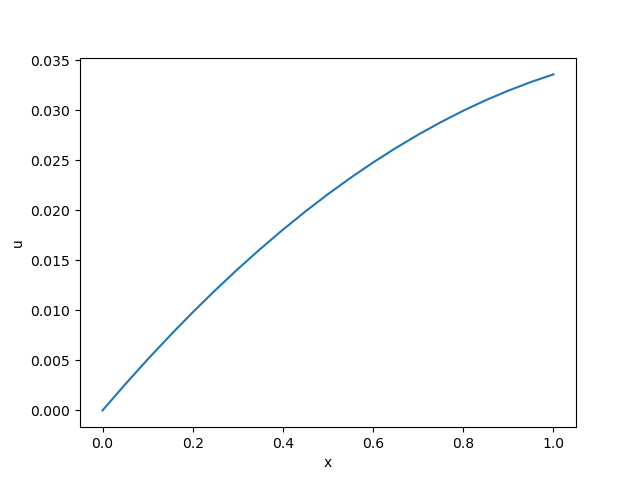

Text(0, 0.5, 'u')

In [11]:
fig = plt.figure()
plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact])
plt.xlabel('x')
plt.ylabel('u')

### Численное решение

In [12]:
n = 7 # количество узлов
L = 1.
h = L/(n - 1) # шаг конечной разности
x_nodes = [i * h for i in range(n)]

A = np.zeros((n, n))
f = np.zeros(n)

for i in range(1, n - 1):
    A[i][i + 1] = E / h ** 2
    A[i][i] = -2 * E / h **2
    A[i][i - 1] =  E / h ** 2
    
    f[i] = -f_a * x_nodes[i] - f_b

Граничное условие Неймана в конечно-разностном виде:

\begin{align}
E\frac{\partial u_i}{\partial x} = E \frac{u_i - u_{i-1}}{h} = t
\end{align}

In [13]:
# u(0) = 0
A[0][0] = 1
f[0] = 0.

# E du / dx = t
A[n - 1][n - 2] = E * (-1.) / h
A[n - 1][n - 1] = E / h
f[n - 1] = t

print('A:')
print(pd.DataFrame(A))
print('f:')
print(pd.DataFrame(f))

A:
              0             1             2             3             4  \
0  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00  0.000000e+00   
2  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12  0.000000e+00   
3  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12  2.520000e+12   
4  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12 -5.040000e+12   
5  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.520000e+12   
6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              5             6  
0  0.000000e+00  0.000000e+00  
1  0.000000e+00  0.000000e+00  
2  0.000000e+00  0.000000e+00  
3  0.000000e+00  0.000000e+00  
4  2.520000e+12  0.000000e+00  
5 -5.040000e+12  2.520000e+12  
6 -4.200000e+11  4.200000e+11  
f:
              0
0  0.000000e+00
1 -2.700000e+09
2 -2.700000e+09
3 -2.700000e+09
4 -2.700000e+09
5 -2.700000e+09
6  1.000000e+09


In [14]:
u_approx = np.linalg.solve(A, f)

### Анализ решения

<IPython.core.display.Javascript object>


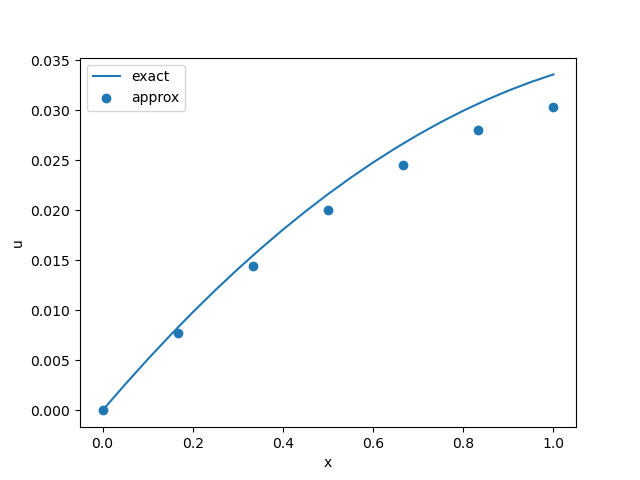

Text(0, 0.5, 'u')

In [15]:
fig = plt.figure()

plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact], label='exact')
plt.scatter(x_nodes, u_approx, label='approx')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')

## Упражнения

1. Аналитически и численно найти поле температур в балке длиной $L=10 [м]$. С одного конца балки поддерживается температура $T_0 = 10[K]$, с другого конца балки температура отводится таким образом, чтобы тепловой поток был постоянен и равен $j_t=1 [Вт/м]$. Коэффициент теплопроводности материала равен 10 [Вт/(м·K)].
2. Аналитически и численно найти поле перемещений в вертикальной балке длиной $L=1[м]$. Один конец балки зафиксирван, другой перемещен на 0.1[м]. Модуль Юнга балки равен 70e9[Па]. Плотность балки $\rho=2.7e6[кг/м]$. Учесть влияние силы тяжести.
3. Численно найти поле перемещений в балке длиной $L=1[м]$. Модуль Юнга одной половины балки равен 70e9[Па], второй - 140e9[Па]. Один конец балки закреплен, второй - перемещен на 0.1[м].
4. Численно найти поле температур в балке длиной $L=1[м]$. Коэффициент теплопроводности материала одной половины балки равен 10[Вт/(м·K)], второй - 20[Вт/(м·K)]. С одного конца балки поддерживается температура $T_0 = 10[K]$, с другого конца - $T_1 = 20[K]$